<a href="https://colab.research.google.com/github/Lavinia-dsci/pracgit/blob/main/scRNA_seq_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Installation

In [1]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 70.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [6]:
#Import the core single cell tools

import scanpy as sc
import anndata as ad
b_marrow_adata = sc.read_h5ad("/content/bone_marrow.h5ad")
print(b_marrow_adata)

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [7]:
# Exploration of dataset
b_marrow_adata.shape

(14783, 17374)

In [8]:
# Exploration of dataset
b_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [9]:
# Exploration of dataset
b_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [10]:
# Exploration of dataset
b_marrow_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


""" Quality Control (QC) - Standardize gene names to be unique (fix duplicates)
Remove cells with very few detected genes (low-quality or dying)
Remove cells with very many detected genes (potential doublets)
Remove genes expressed in only a small number of cells """

In [11]:
# Standardize gene names
b_marrow_adata.var_names_make_unique()
b_marrow_adata.obs_names_make_unique()

In [12]:
#Identify contamination
b_marrow_adata.var['MT'] = b_marrow_adata.var_names.str.startswith("MT-")
b_marrow_adata.var['RIBO'] = b_marrow_adata.var_names.str.startswith("RPS", "RPL")
b_marrow_adata.var['HB'] = b_marrow_adata.var_names.str.startswith("^HB[^(P)]")

In [13]:
#Calculating QC metrics
sc.pp.calculate_qc_metrics(
    b_marrow_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)
b_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
b_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


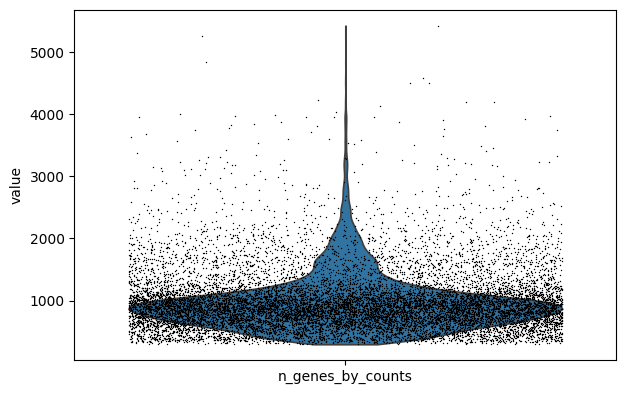

In [15]:
#Average number of genes with at least one detected identifier in each cell
sc.pl.violin(
    b_marrow_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

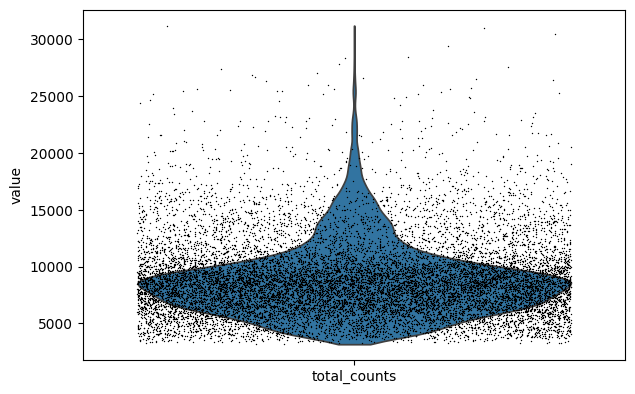

In [16]:
#Total number of molecules (UMI) detected in cell.
sc.pl.violin(
    b_marrow_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

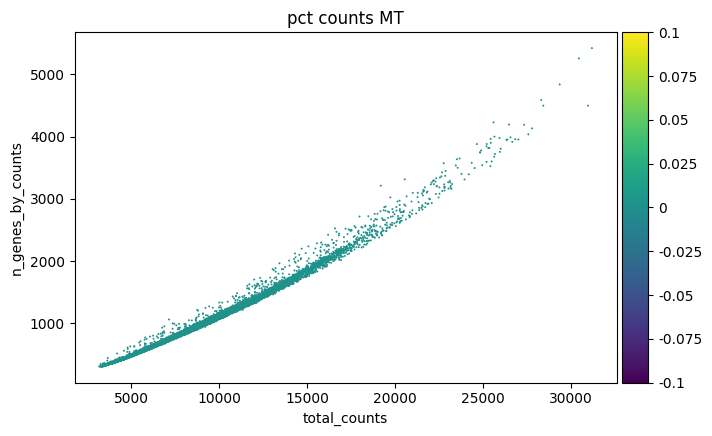

In [17]:
#Visualization of mt genes
sc.pl.scatter(b_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

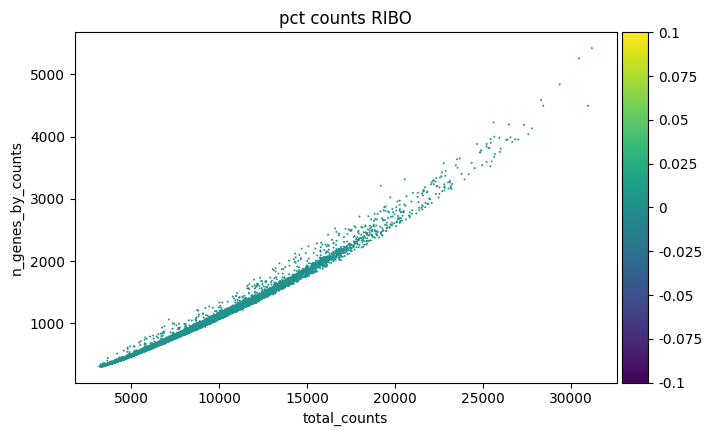

In [18]:
#visualization of ribosomal genes
sc.pl.scatter(b_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

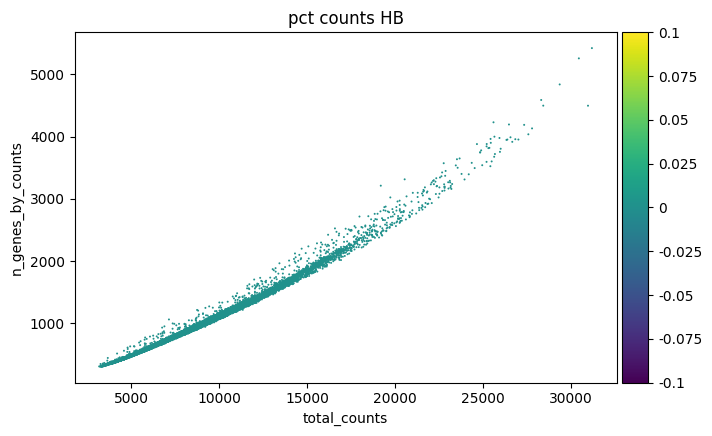

In [19]:
#Visualization of HB genes
sc.pl.scatter(b_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

""" From the exploration of contaminats, it was found that there are no contaminations in this dataset """



In [20]:
sc.pp.scrublet(b_marrow_adata)

SystemError: CPUDispatcher(<function nn_descent at 0x7b9c82c04900>) returned a result with an exception set

Normalization
Adjust sequencing depth differences between cells.
Aim is to scale counts so each cell has the same total expression.

In [24]:
#Save a copy of the bone marrow data
b_marrow_adata.layers["counts"] = b_marrow_adata.X.copy()

In [21]:
#Normalizing to median total counts
sc.pp.normalize_total(b_marrow_adata)
#Log of the data
sc.pp.log1p(b_marrow_adata)

In [22]:
#Selecting top 1000 most variable genes
sc.pp.highly_variable_genes(b_marrow_adata, n_top_genes=1000)

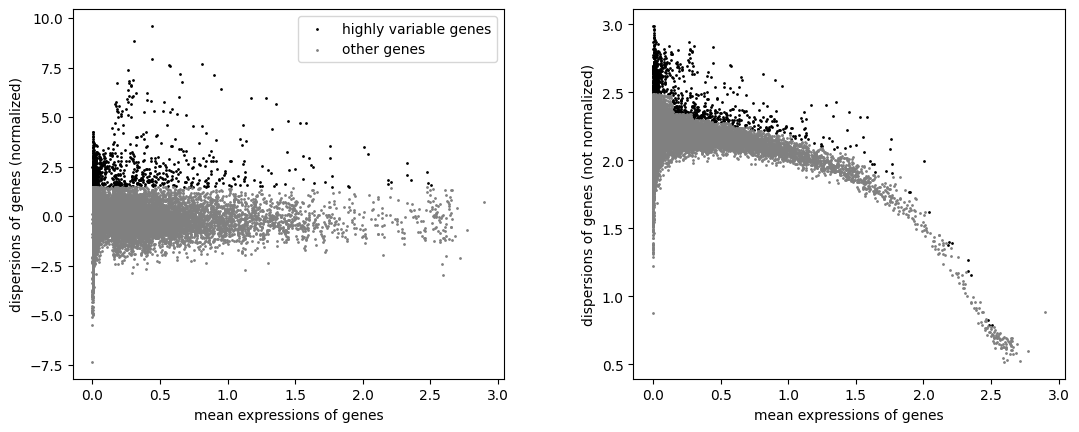

In [23]:
sc.pl.highly_variable_genes(b_marrow_adata)

""" Dimensionality Reduction (PCA) PCA is used to reduce data complexity and show variation patterns. """

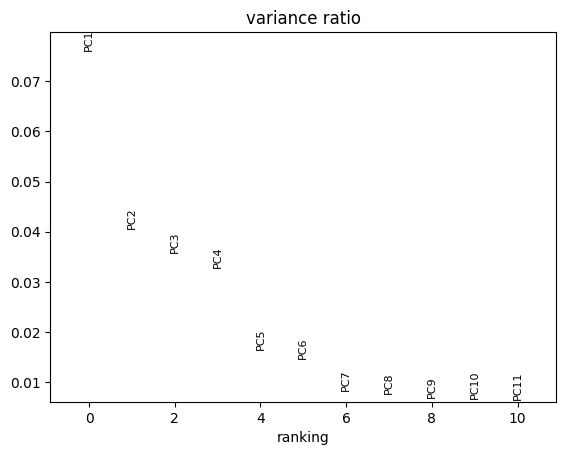

In [25]:
sc.tl.pca(b_marrow_adata)
sc.pl.pca_variance_ratio(b_marrow_adata, n_pcs=10, log=False)

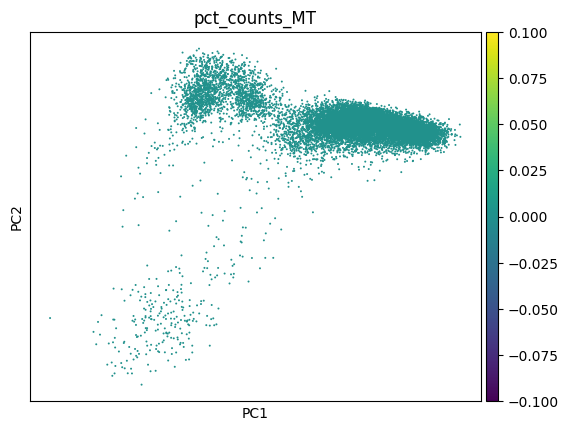

In [26]:
sc.pl.pca(
    b_marrow_adata,
    color=["pct_counts_MT"]
)

In [27]:
sc.pp.neighbors(b_marrow_adata)
sc.tl.umap(b_marrow_adata)

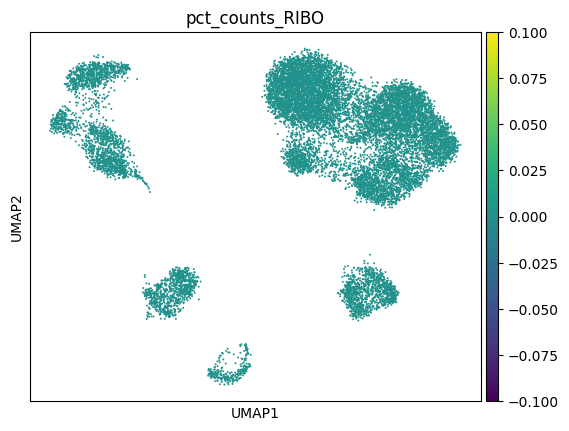

In [28]:
sc.pl.umap(
    b_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

In [29]:
sc.tl.leiden(b_marrow_adata, flavor="igraph", n_iterations=2)

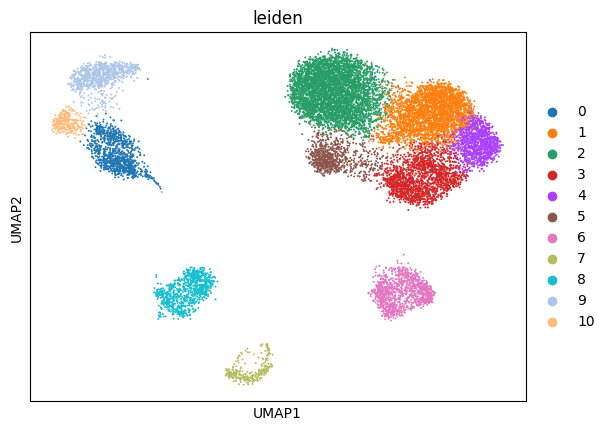

In [30]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden"],
    size=8,
)

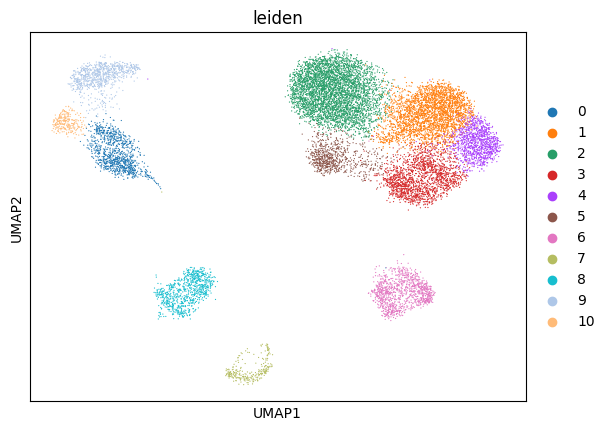

In [31]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden"],
    wspace=0.5,
    size=3,
    ncols = 1
)

In [33]:
b_marrow_adata.obs.columns

Index(['disease stage', 'treatment', 'timepoint', 'Dataset', 'sample',
       'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage',
       'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts',
       'percent_mito', 'tissue_original', 'tissue_ontology_term_id',
       'disease_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 't

KeyError: 'predicted_doublet'

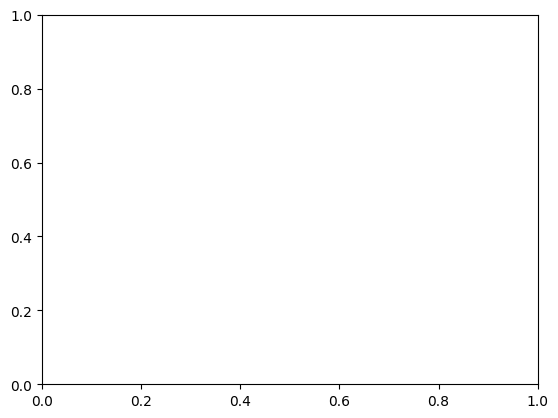

In [32]:
sc.pl.umap(
    b_marrow_adata,
    color=[ "predicted_doublet"],
    wspace=0.5,
    size=3,
    ncols = 1
)

In [34]:
sc.tl.leiden(b_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(b_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(b_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

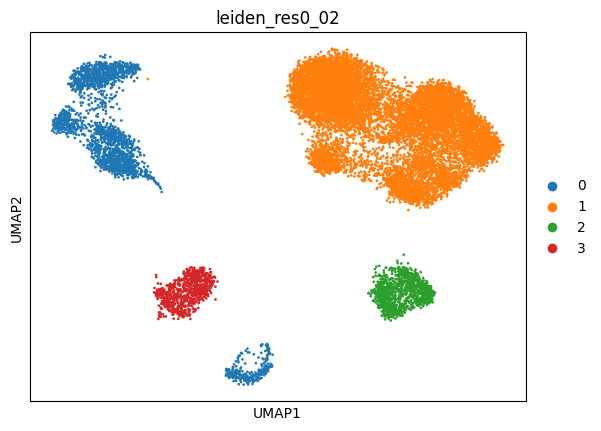

In [35]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden_res0_02"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

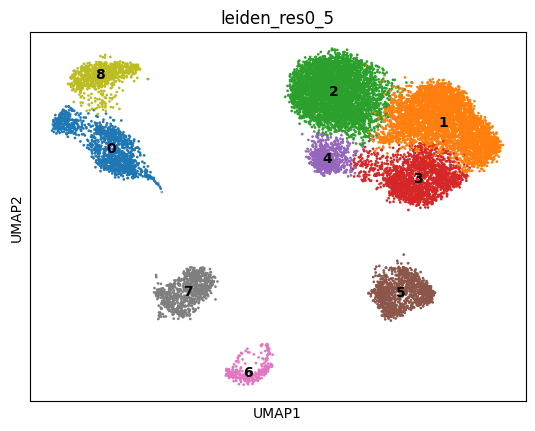

In [36]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden_res0_5"],
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

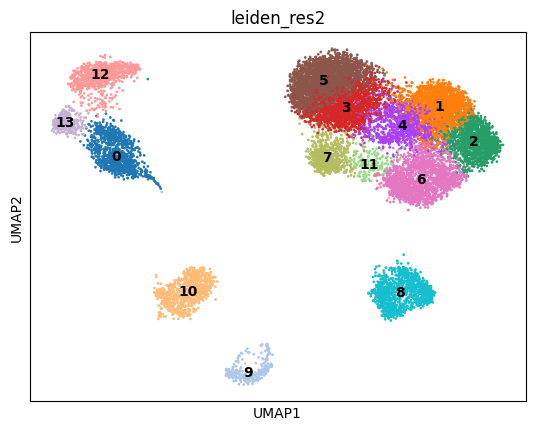

In [37]:
sc.pl.umap(
    b_marrow_adata,
    color=["leiden_res2"],
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

""" Cell annotation
Assign biological meaning to each cluster found in the dataset.

In [38]:
import decoupler as dc

In [134]:
# Query Omnipath and get CellMarker
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.tail()

,source,target
,,
8201,B cells naive,ZNF286A
8202,Pluripotent stem cells,ZNF296
8203,Adipocytes,ZNF423
8205,Gamma (PP) cells,ZNF503
8208,Germ cells,ZPBP2


In [136]:
b_marrow_adata.var_names = b_marrow_adata.var['feature_name']
b_marrow_adata.var_names_make_unique()

dc.mt.ulm(data=b_marrow_adata,
          net=markers,
          tmin = 3)

TypeError: Cannot setitem on a Categorical with a new category (NPIPA9-1), set the categories first

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_dendrogram.py:138: UserWarning: You’re trying to run this on 126 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  _choose_representation(adata, use_rep=use_rep, n_pcs=n_pcs)


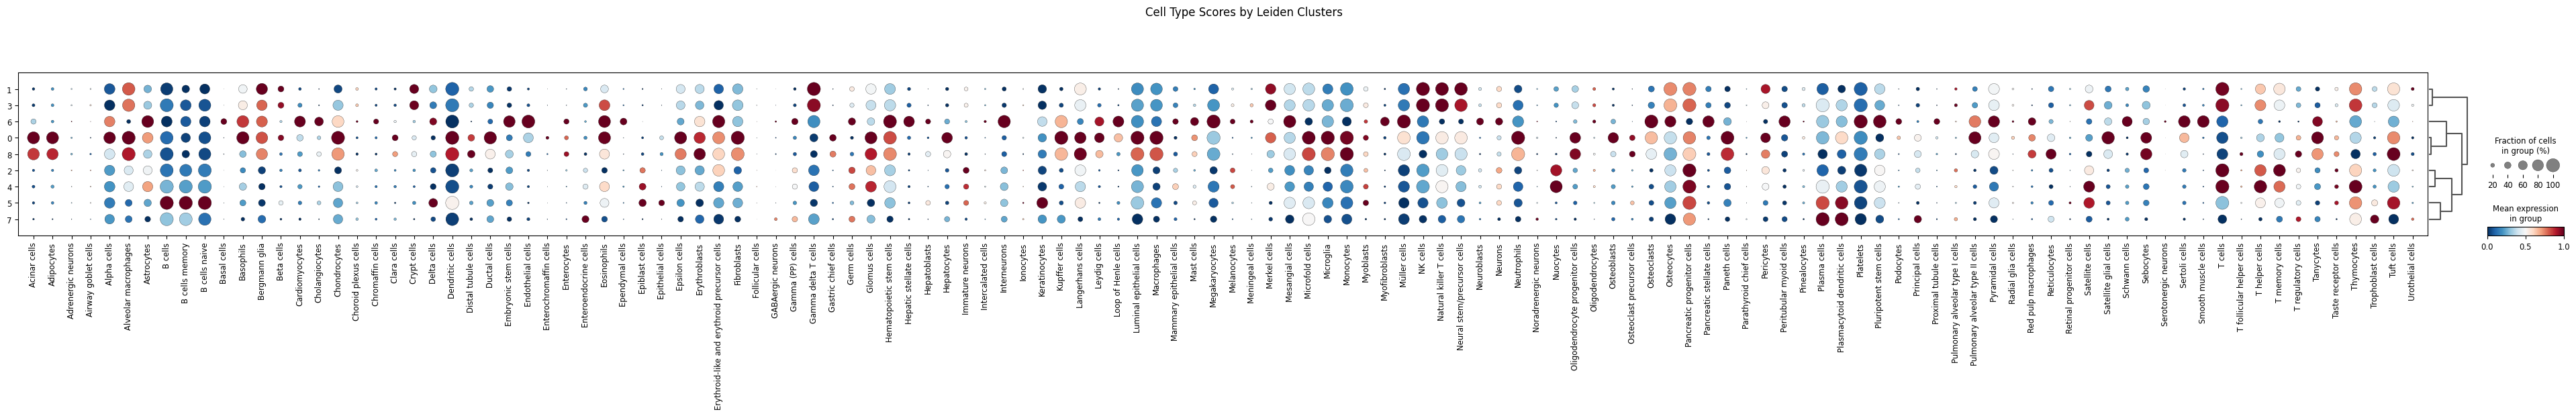

In [137]:
import pandas as pd
# Create a temporary AnnData object for plotting decoupler scores using scanpy
score_adata = ad.AnnData(X=b_marrow_adata.obsm['score_ulm'],
                         obs=b_marrow_adata.obs,
                         var=pd.DataFrame(index=b_marrow_adata.obsm['score_ulm'].columns))

sc.pl.dotplot(
    score_adata,
    var_names=score_adata.var_names.tolist(), # List of cell types (features)
    groupby='leiden_res0_5',
    cmap='RdBu_r', # A common colormap for scores
    dendrogram=True,
    standard_scale='var', # Scale scores for better visualization
    title='Cell Type Scores by Leiden Clusters'
)

In [138]:
#retrieve the score for each cell type

score = dc.pp.get_obsm(b_marrow_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 14783 × 126
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', '

In [139]:
#preview the data
b_marrow_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,T follicular helper cells,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trophoblast cells,Tuft cells,Urothelial cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.883366,0.016440,-0.592726,-0.662709,0.835840,0.855729,0.297566,1.485696,-0.306571,0.237990,...,-0.513300,-0.422886,1.642851,-0.004406,0.544296,0.413771,-0.543441,-0.513300,3.113940,-0.784177
Guo-AAACCTGAGAGGTTGC-7,-0.906417,-1.284214,-0.467915,-0.523161,1.583154,1.219329,0.157764,0.487843,-0.624417,1.770228,...,-0.405214,3.168090,-0.405214,0.462934,0.897830,0.897830,3.848090,-0.405214,-0.202421,-0.619050
Guo-AAACCTGAGATACACA-3,-0.892457,-0.682421,-0.460709,-0.515104,1.573294,1.187902,1.656056,3.930777,1.925992,2.500056,...,-0.398974,1.170355,2.442601,-0.798165,0.925009,-0.651620,1.906375,2.286422,0.851602,-0.609516
Guo-AAACCTGAGCGATTCT-1,-0.922276,-0.772815,-0.476102,-0.532314,0.269852,1.180849,0.774435,4.512301,1.123891,1.731658,...,-0.412304,0.081099,2.300032,-0.824834,-0.673392,-0.673392,0.929784,-0.412304,1.709482,-0.629881
Guo-AAACCTGAGTGAAGAG-3,-0.643675,-0.510286,-0.332284,-0.371516,-0.621831,1.977723,0.019345,1.642936,2.016226,2.030037,...,-0.287758,2.170472,3.344478,1.184859,-0.469977,-0.469977,-0.761742,-0.287758,1.787138,-0.439610


In [140]:
b_marrow_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocytes', 'Adrenergic neurons',
       'Airway goblet cells', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       ...
       'T follicular helper cells', 'T helper cells', 'T memory cells',
       'T regulatory cells', 'Tanycytes', 'Taste receptor cells', 'Thymocytes',
       'Trophoblast cells', 'Tuft cells', 'Urothelial cells'],
      dtype='object', length=126)

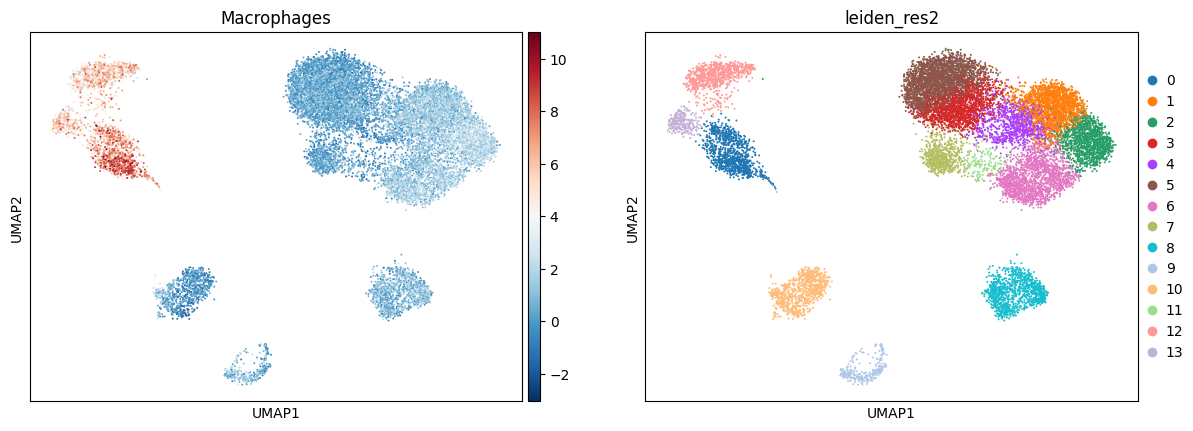

In [141]:
sc.pl.umap(score, color=["Macrophages", "leiden_res2"], cmap="RdBu_r")

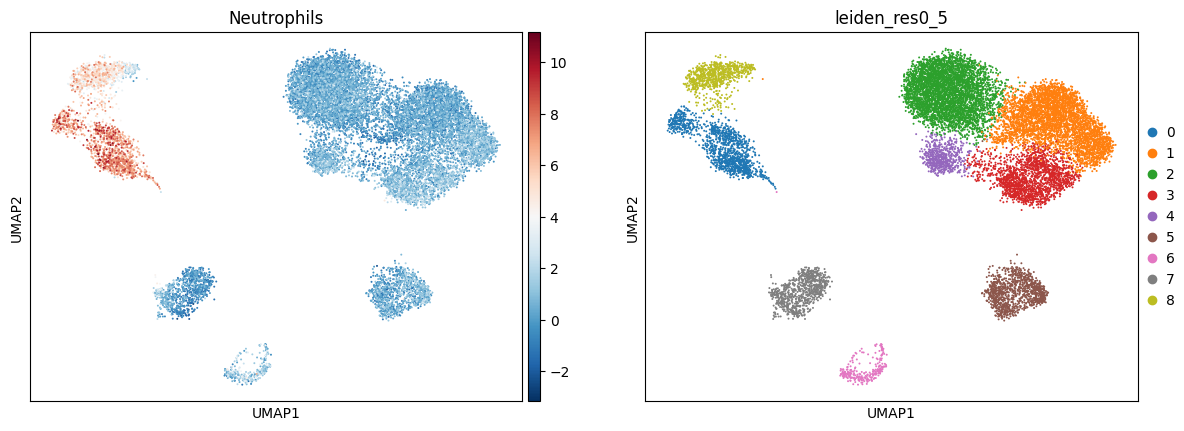

In [142]:
sc.pl.umap(score, color=["Neutrophils", "leiden_res0_5"], cmap="RdBu_r")

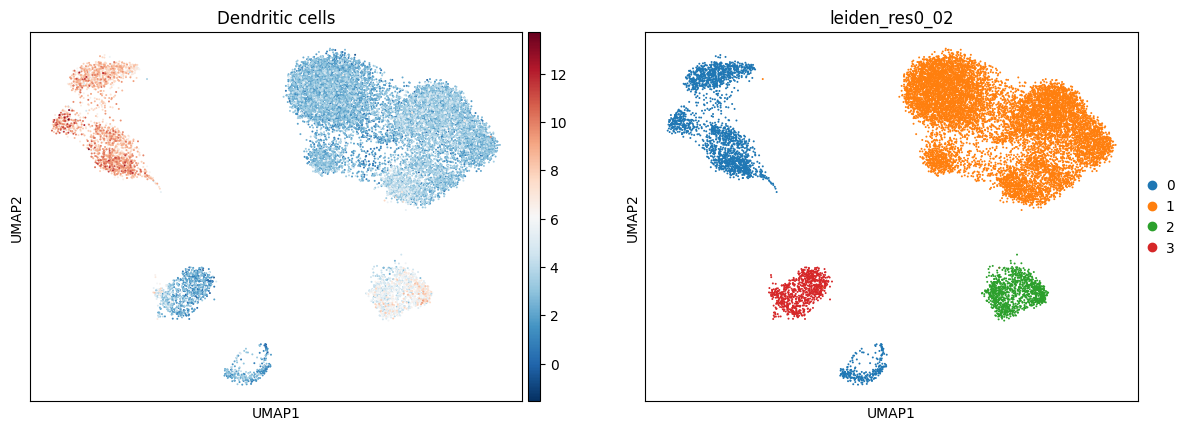

In [117]:
sc.pl.umap(score, color=["Dendritic cells", "leiden_res0_02"], cmap="RdBu_r")

In [50]:
import seaborn as sns

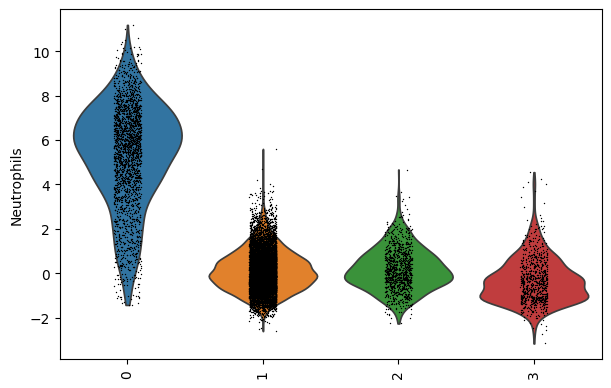

In [69]:
sc.pl.violin(score, keys=["Neutrophils"], groupby="leiden_res0_02", rotation=90)

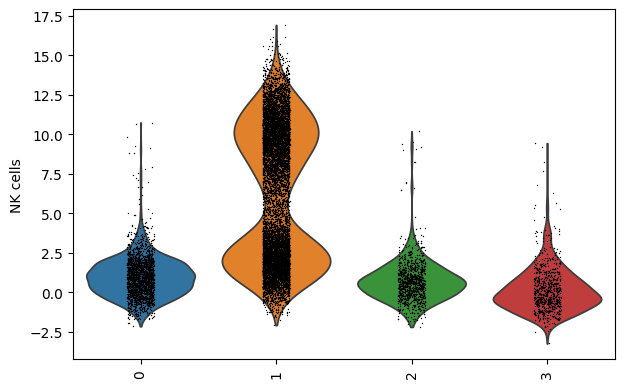

In [66]:
sc.pl.violin(score, keys=["NK cells"], groupby="leiden_res0_02", rotation=90)

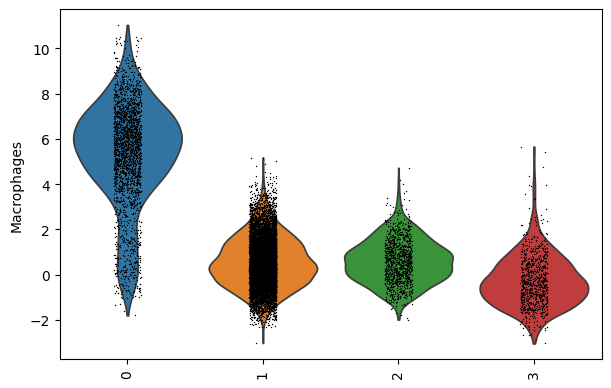

In [70]:
sc.pl.violin(score, keys=["Macrophages"], groupby="leiden_res0_02", rotation=90)

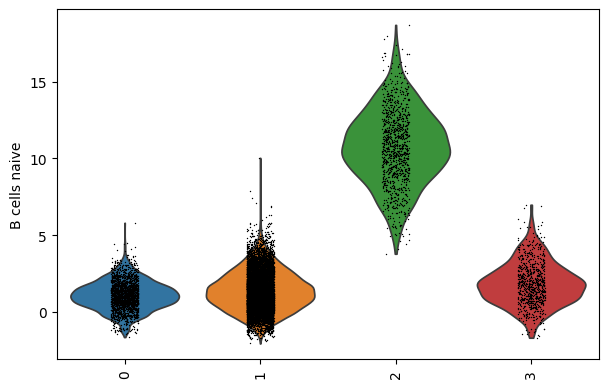

In [67]:
sc.pl.violin(score, keys=["B cells naive"], groupby="leiden_res0_02", rotation=90)

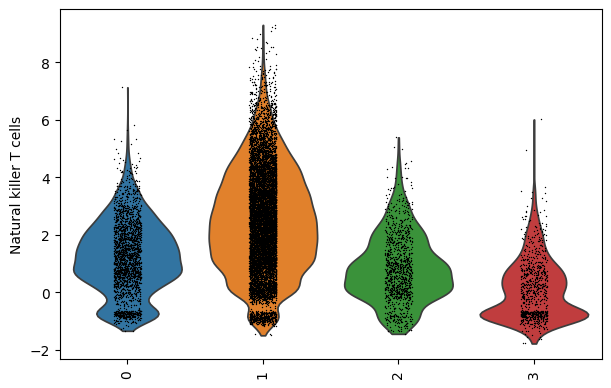

In [68]:
sc.pl.violin(score, keys=["Natural killer T cells"], groupby="leiden_res0_02", rotation=90)

In [107]:
#rank genes
b_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_02", reference="rest", method="t-test_overestim_var")
b_marrow_adata_rank = b_marrow_adata_rank[b_marrow_adata_rank["stat"] > 0]
b_marrow_adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,99.740928,5.211609,0.0,0.0
1,0,rest,Macrophages,89.762131,4.809140,0.0,0.0
2,0,rest,Microglia,86.999779,3.630187,0.0,0.0
3,0,rest,Kupffer cells,85.011970,2.223117,0.0,0.0
4,0,rest,Dendritic cells,83.044102,4.702767,0.0,0.0


In [55]:
cluster_annotations = b_marrow_adata_rank[b_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()

/tmp/ipython-input-1605432823.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = b_marrow_adata_rank[b_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [56]:
cluster_annotations

{'0': 'Neutrophils', '1': 'T cells', '2': 'B cells naive', '3': 'Plasma cells'}

In [57]:
b_marrow_adata.obs['cell_type'] = b_marrow_adata.obs['leiden_res0_02'].map(cluster_annotations)


In [99]:
# Example of how to subset for multiple genes in the 'source' column
available_genes = set(b_marrow_adata.var_names)

neutro_markers = markers[markers['source'].isin(['Neutrophils'])]['target']
neutro_markers = neutro_markers[neutro_markers.isin(available_genes)]

macro_markers = markers[markers['source'].isin(['Macrophages'])]['target']
macro_markers = macro_markers[macro_markers.isin(available_genes)]

den_cells_markers = markers[markers['source'].isin(['Dendritic cells'])]['target']
den_cells_markers = den_cells_markers[den_cells_markers.isin(available_genes)]

kup_cells_markers = markers[markers['source'].isin(['Kupffer cells'])]['target']
kup_cells_markers = kup_cells_markers[kup_cells_markers.isin(available_genes)]

micro_markers = markers[markers['source'].isin(['Microglia'])]['target']
micro_markers = micro_markers[micro_markers.isin(available_genes)]

In [100]:
marker_genes_dict = {
    "Neutrophils":neutro_markers.head().tolist(),
    "Macrrophages": macro_markers.head().tolist(),
    "Dendritic cells": den_cells_markers.head().tolist(),
     "Kupffer cells": kup_cells_markers.head().tolist(),
     "Microglia": micro_markers.head().tolist()
}

categories: 0, 1, 2, etc.
var_group_labels: Neutrophils, Macrrophages, Dendritic cells, etc.


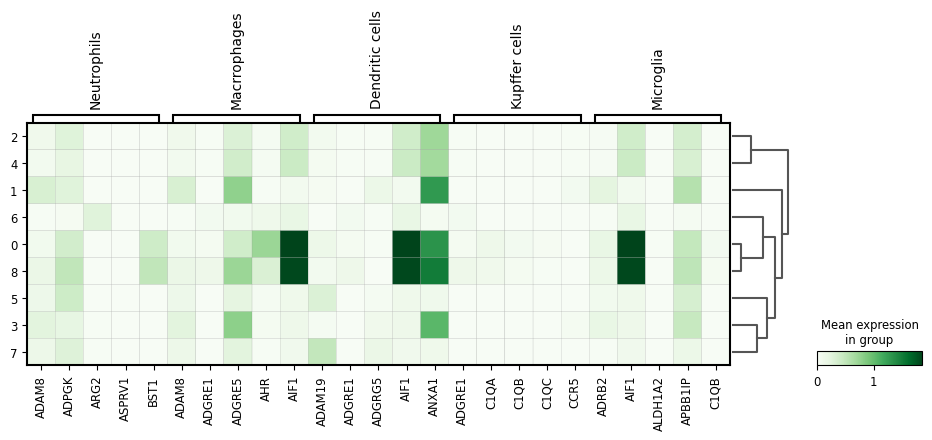

In [118]:
sc.pl.matrixplot(
    b_marrow_adata,
    marker_genes_dict,
    "leiden_res0_5",
    dendrogram=True,
    cmap="Greens",
    use_raw=False
)

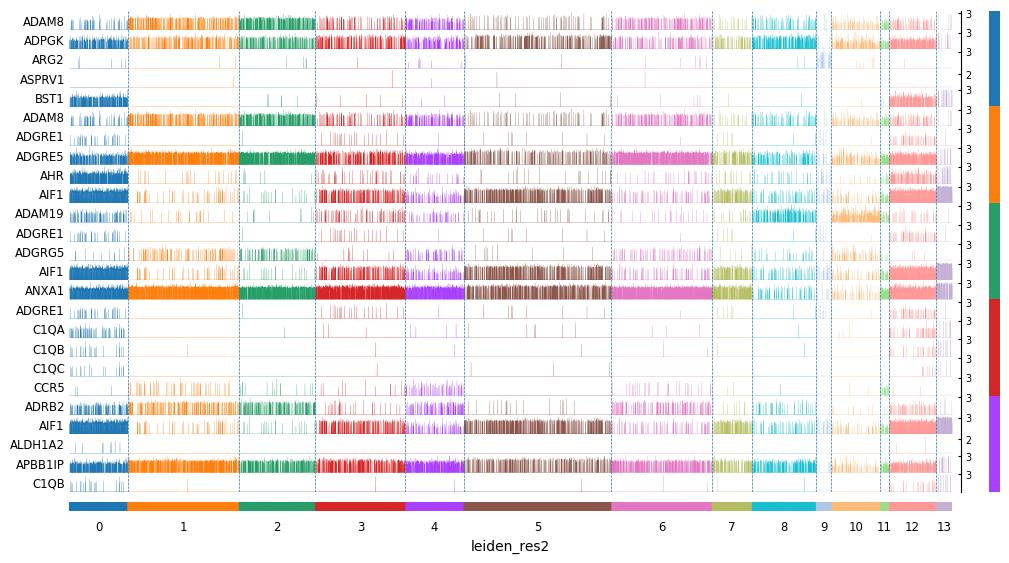

In [125]:
sc.pl.tracksplot(b_marrow_adata, marker_genes_dict, groupby="leiden_res2", dendrogram=False, use_raw=False)